In [ ]:
!pip install streamlit pandas numpy scikit-learn xgboost shap transformers huggingface_hub joblib matplotlib pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

In [ ]:
# loading data
china_data = pd.read_csv('china.csv')

In [ ]:
# china summary
china_data.describe

<bound method NDFrame.describe of       id   ID   AFP  Input  Output  Enquiry  File  Interface  Added  Changed  \
0      1    1  1587    774     260      340   128          0   1502        0   
1      2    2   260      9       4        3   193         41     51      138   
2      3    3   152     25      33       28    42         35    163        0   
3      4    4   252    151      28        8    39          0     69      153   
4      5    5   292     93       0      194    20          0      0      307   
..   ...  ...   ...    ...     ...      ...   ...        ...    ...      ...   
494  495  495    51     32       0       16     7          0      0       55   
495  496  496  1106    410     267      108   152         25    962        0   
496  497  497    99     13      32        3    42          5     95        0   
497  498  498    56     24       0        9    14          0     47        0   
498  499  499   213    123      91       28     0          0     36      206   

     Deleted  PDR_AFP  PDR_UFP  NPDR_AFP  NPDU_UFP  Resource  Dev.Type  \
0          0      4.7      5.0       4.7       5.0         4         0   
1         61     16.0     16.6      16.0      16.6         2         0   
2          0      4.4      4.1       4.4       4.1         1         0   
3          4     12.8     14.3      15.5      17.3         1         0   
4          0     10.3      9.8      12.4      11.7         1         0   
..       ...      ...      ...       ...       ...       ...       ...   
494        0     17.6     16.3      21.2      19.7         1         0   
495        0     15.0     17.2      17.2      19.8         2         0   
496        0      5.3      5.5       6.4       6.7         1         0   
497        0      7.9      9.4       7.9       9.4         2         0   
498        0     10.3      9.0      10.3       9.0         1         0   

     Duration  N_effort  Effort  
0         4.0      7490    7490  
1        17.0      4150    4150  
2         9.0       668     668  
3         4.0      3901    3238  
4        13.0      3607    2994  
..        ...       ...     ...  
494       3.0      1083     899  
495      20.0     19034   16560  
496       4.0       634     526  
497       6.0       440     440  
498       7.0      2185    2185  

[499 rows x 20 columns]>

In [ ]:
china_data.head()

,id,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
0,1,1,1587,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490,7490
1,2,2,260,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150,4150
2,3,3,152,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668,668
3,4,4,252,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3901,3238
4,5,5,292,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,3607,2994


In [ ]:
# using simple-imputer to handle missing values in china_data
from sklearn.impute import SimpleImputer
imputer_mode = SimpleImputer(strategy='most_frequent', fill_value='Unknown')
china_data_imputed = imputer_mode.fit_transform(china_data)
china_data_cleaned = pd.DataFrame(china_data_imputed, columns=china_data.columns)

# verfication - if anything is missing
china_data_cleaned.isnull().sum()

,0
id,0
ID,0
AFP,0
Input,0
Output,0
Enquiry,0
File,0
Interface,0
Added,0
Changed,0


In [ ]:
china_data_cleaned.describe()

,id,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000
mean,250.000000,250.000000,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,11.770541,12.07976,13.269739,13.626253,1.458918,0.0,8.719238,4277.641283,3921.048096
std,144.193157,144.193157,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.105649,12.81871,14.009840,14.843416,0.823729,0.0,7.347058,7071.248036,6480.855600
min,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.30000,0.400000,0.400000,1.000000,0.0,1.000000,31.000000,26.000000
25%,125.500000,125.500000,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.300000,4.20000,4.600000,4.400000,1.000000,0.0,4.000000,776.000000,703.500000
50%,250.000000,250.000000,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.100000,8.00000,8.800000,8.900000,1.000000,0.0,7.000000,2098.000000,1829.000000
75%,374.500000,374.500000,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.400000,15.75000,16.350000,16.900000,2.000000,0.0,11.000000,4192.000000,3826.500000
max,499.000000,499.000000,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,83.800000,96.60000,101.000000,108.300000,4.000000,0.0,84.000000,54620.000000,54620.000000


In [ ]:
# initial data augmenting function
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

def augment_data_gmm(
    df,
    n_synth=1000,
    n_components=5,
    feature_noise=0.1,
    random_state=42
):
    """
    Generate synthetic samples via a Gaussian Mixture Model with expanded variability.
    Adds a 'source' column indicating 'original' or 'synthetic'.

    Args:
        df: DataFrame with original data (must include 'source' column if concatenating later).
        n_synth: number of synthetic samples to generate.
        n_components: GMM mixture components.
        feature_noise: fraction of each feature's std to add as jitter.
        random_state: seed for reproducibility.

    Returns:
        DataFrame of synthetic samples (without original rows).
    """
    np.random.seed(random_state)
    # Define feature lists
    numeric_cols = [
        'AFP','Input','Output','Enquiry','File','Interface',
        'Added','Changed','Deleted','PDR_AFP','PDR_UFP',
        'NPDR_AFP','NPDU_UFP','Resource','Duration','N_effort','Effort'
    ]
    cat_col = 'Dev.Type'

    # Extract numeric data
    X_real = df[numeric_cols].values
    # Compute empirical stds for noise scaling and bounds
    stds = df[numeric_cols].std().values
    bounds = {col: (df[col].min(), df[col].max()) for col in numeric_cols}

    # Fit GMM
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type='full',
        random_state=random_state
    )
    gmm.fit(X_real)

    # Sample synthetic numeric
    synth_num, _ = gmm.sample(n_synth)
    # Clip to bounds
    for i, col in enumerate(numeric_cols):
        low, high = bounds[col]
        synth_num[:, i] = np.clip(synth_num[:, i], low, high)
    # Add jitter to increase variability
    noise = np.random.normal(
        loc=0,
        scale=feature_noise * stds,
        size=synth_num.shape
    )
    synth_num = np.clip(synth_num + noise,
                        [bounds[c][0] for c in numeric_cols],
                        [bounds[c][1] for c in numeric_cols])

    # Sample categorical uniformly
    rng = np.random.RandomState(random_state)
    cat_vals = [0, 1]
    synth_cat = rng.choice(cat_vals, size=n_synth)

    # Build synthetic DataFrame
    df_syn = pd.DataFrame(synth_num, columns=numeric_cols)
    df_syn[cat_col] = synth_cat
    df_syn['source'] = 'synthetic'
    return df_syn

In [ ]:
china_data_augment = augment_data_gmm(china_data_cleaned, n_synth = 10000, n_components = 5, random_state = 42)

In [ ]:
china_data_augment.to_csv('china_synthetic.csv', index=False)

In [ ]:
# differences between the summary statistics of the augmented and the real data
china_data_augment.describe() - china_data_cleaned.describe()

,AFP,Added,Changed,Deleted,Dev.Type,Duration,Effort,Enquiry,File,ID,Input,Interface,NPDR_AFP,NPDU_UFP,N_effort,Output,PDR_AFP,PDR_UFP,Resource,id
count,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,NaN,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,NaN
mean,39.966856,44.891950,45.786772,13.891832,0.498700,0.463458,145.907406,8.472964,14.685350,NaN,21.816815,11.114900,1.348303,1.426131,155.973658,16.765610,1.143018,1.111709,0.147543,NaN
std,-26.822680,-30.006910,-52.310496,-34.691572,0.500023,-0.592683,-61.337783,-9.283403,-11.823591,NaN,-21.980546,-12.383782,-2.008626,-2.198376,-112.055633,-10.572561,-1.305532,-1.787860,-0.193698,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,-1.105233,17.193217,11.525838,0.000000,0.000000,-0.048185,220.016909,3.775348,0.110939,NaN,-1.196164,3.146371,-0.407581,-0.245136,254.338053,7.649539,-0.483469,-0.237805,0.054921,NaN
50%,43.693799,61.966041,61.580868,3.839020,0.000000,1.271112,581.630485,15.670606,13.431854,NaN,29.643720,17.954236,4.128179,4.254515,589.633186,24.755283,3.378259,3.565690,0.433975,NaN
75%,74.585742,95.692888,65.703401,16.329626,1.000000,1.979701,418.536313,16.318567,21.413997,NaN,36.283130,22.564635,5.581308,5.620655,440.981732,25.501666,3.956040,3.842534,-0.009593,NaN
max,0.000000,0.000000,-932.025724,-1268.457283,1.000000,-24.376585,0.000000,0.000000,0.000000,NaN,0.000000,-294.752126,-26.428057,-26.195799,0.000000,0.000000,-16.456177,-21.580562,0.000000,NaN


In [ ]:
# domain specific feature engineering
def feature_engineering(df):
    # Target
    df['overrun_pct'] = df['Effort'] / df['N_effort'] - 1
    # Core predictors
    df['churn_rate'] = (df['Added'] + df['Changed'] + df['Deleted']) / df['AFP']
    df['pdr_ratio'] = df['PDR_AFP'] / df['AFP']
    df['prod_nominal'] = df['AFP'] / df['N_effort']
    df['team_intensity'] = df['Resource'] / df['Duration']
    # Optional interaction
    df['churn_x_team'] = df['churn_rate'] * df['team_intensity']
    return df


In [ ]:
# adding the engineered features
china_data_augmented_fe = feature_engineering(china_data_augment)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.mixture import GaussianMixture
import joblib as jb

# Load your real dataset
df_real = pd.read_csv('china_synthetic.csv')
df_real['source'] = 'original'

# Define an augmentation function that samples targets empirically and lightly jitters features
def augment_data_empirical(df, n_synth=5000, feature_noise=0.02, random_state=42):
    """
    - GMM-sample features (excluding Effort and overrun_pct), add light jitter
    - Sample overrun_pct from the real empirical distribution
    - Recompute Effort = N_effort*(1+overrun_pct)
    - Tag rows as 'synthetic'
    """
    np.random.seed(random_state)
    feats = ['AFP','Input','Output','Enquiry','File','Interface',
             'Added','Changed','Deleted','PDR_AFP','PDR_UFP',
             'NPDR_AFP','NPDU_UFP','Resource','Duration','N_effort']
    real = df.copy()
    real['overrun_pct'] = real['Effort']/real['N_effort'] - 1
    overrun_vals = real['overrun_pct'].values

    # Fit GMM on predictors only
    X_real = real[feats].values
    gmm = GaussianMixture(n_components=5, random_state=random_state)
    gmm.fit(X_real)
    stds = real[feats].std().values
    bounds = {c:(real[c].min(), real[c].max()) for c in feats}

    rows = []
    for _ in range(n_synth):
        x, _ = gmm.sample(1)
        x = x.flatten()
        # light jitter
        x += np.random.normal(0, feature_noise*stds)
        # clip to bounds
        for i,c in enumerate(feats):
            lo, hi = bounds[c]
            x[i] = np.clip(x[i], lo, hi)
        # sample target from real
        ovr = np.random.choice(overrun_vals)
        # recompute Effort
        eff = x[feats.index('N_effort')] * (1 + ovr)
        # assemble
        row = {c: x[i] for i,c in enumerate(feats)}
        row['overrun_pct'] = ovr
        row['Effort'] = eff
        row['Dev.Type'] = np.random.randint(0, 2)
        row['source'] = 'synthetic'
        rows.append(row)
    return pd.DataFrame(rows)

# Generate synthetic data with reduced variance
df_syn = augment_data_empirical(df_real.drop(columns='source'),
                                n_synth=5000,
                                feature_noise=0.02,
                                random_state=42)

# Combine real + synthetic
df_aug = pd.concat([df_real, df_syn], ignore_index=True)

# Compute engineered features
df_aug['churn_rate']     = (df_aug['Added'] + df_aug['Changed'] + df_aug['Deleted']) / df_aug['AFP']
df_aug['pdr_ratio']      = df_aug['PDR_AFP'] / df_aug['AFP']
df_aug['prod_nominal']   = df_aug['AFP'] / df_aug['N_effort']
df_aug['team_intensity'] = df_aug['Resource'] / df_aug['Duration']

# Split real vs. synthetic, then stratify real into train/test
real      = df_aug[df_aug['source']=='original'].copy()
synthetic = df_aug[df_aug['source']=='synthetic'].copy()

# Compute bins; drop any rows where binning failed
real['overrun_pct'] = real['Effort'] / real['N_effort'] - 1
real['bin'] = pd.qcut(real['overrun_pct'], 5, labels=False, duplicates='drop')
real = real.dropna(subset=['bin']).copy()
real['bin'] = real['bin'].astype(int)

# Now you can stratify safely
real_train, real_test = train_test_split(
    real,
    test_size=0.2,
    random_state=42,
    stratify=real['bin']
)
real_train.drop(columns='bin', inplace=True)
real_test .drop(columns='bin', inplace=True)

# Prepare train/test matrices
features = [
    'AFP','Input','Output','Enquiry','File','Interface',
    'Added','Changed','Deleted','PDR_AFP','PDR_UFP',
    'NPDR_AFP','NPDU_UFP','Resource','Duration','N_effort',
    'churn_rate','pdr_ratio','prod_nominal','team_intensity'
]

X_train, y_train = real_train[features], real_train['overrun_pct']
X_test,  y_test  = real_test[features], real_test['overrun_pct']

# Compute sample weights: upweight real rows
sample_weights = np.where(real_train['source']=='original', 5.0, 1.0)
# Define a simpler, more regularized XGBoost
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    max_depth=3,
    n_estimators=200,
    learning_rate=0.05,
    reg_lambda=10,
    reg_alpha=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit with sample weights
model.fit(X_train, y_train, sample_weight=sample_weights)

# Evaluate
for name, X, y in [('Train', X_train, y_train), ('Test', X_test, y_test)]:
    pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, pred))
    r2   = r2_score(y, pred)
    mae  = mean_absolute_error(y, pred)
    print(f"{name} → RMSE: {rmse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

# export model
jb.dump(model, 'xgb_model_1.pkl')


Train → RMSE: 2.9512, R²: 0.7797, MAE: 1.0184
Test → RMSE: 4.1066, R²: 0.6030, MAE: 1.2303


['xgb_model_1.pkl']

In [ ]:
# Hyperparameter tuning for the XGBoost model (with best params printed)
import joblib
from sklearn.model_selection import RandomizedSearchCV, KFold

# Define base model and search space
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_dist = {
    'max_depth':       [3, 4, 6],
    'learning_rate':   [0.01, 0.05, 0.1],
    'n_estimators':    [100, 200, 500],
    'subsample':       [0.6, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0],
    'reg_lambda':      [1, 5, 10],
    'reg_alpha':       [0, 0.1, 1]
}

# Set up randomized search with 3-fold CV
kf = KFold(n_splits=3, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit, passing sample weights
search.fit(X_train, y_train, sample_weight=sample_weights)

# Retrieve best estimator and hyperparameters
model = search.best_estimator_
print("Best hyperparameters:", search.best_params_)

# Evaluate on test set
y_pred = model.predict(X_test)
print(f"Tuned XGB → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))} "
      f"R²: {r2_score(y_test, y_pred):.4f}, "
      f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

# 6) Export the tuned model
joblib.dump(model, "xgb_tuned_best_param.pkl")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Tuned XGB → RMSE: 3.9876100711084392 R²: 0.6257, MAE: 1.1141


['xgb_tuned_best_param.pkl']

Top 10 features by mean(|SHAP|):
        feature  mean_abs_shap
0      N_effort       2.104037
1       Deleted       1.236208
2  prod_nominal       0.448482
3      NPDR_AFP       0.401438
4      NPDU_UFP       0.260255
5           AFP       0.212236
6       PDR_UFP       0.174705
7        Output       0.128878
8     Interface       0.125822
9       PDR_AFP       0.111000


<ipython-input-16-da504c07419d>:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


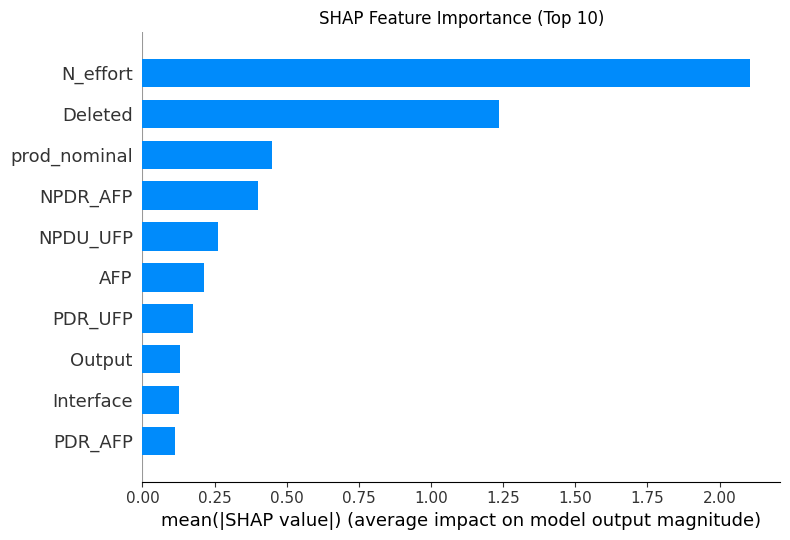

<ipython-input-16-da504c07419d>:40: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


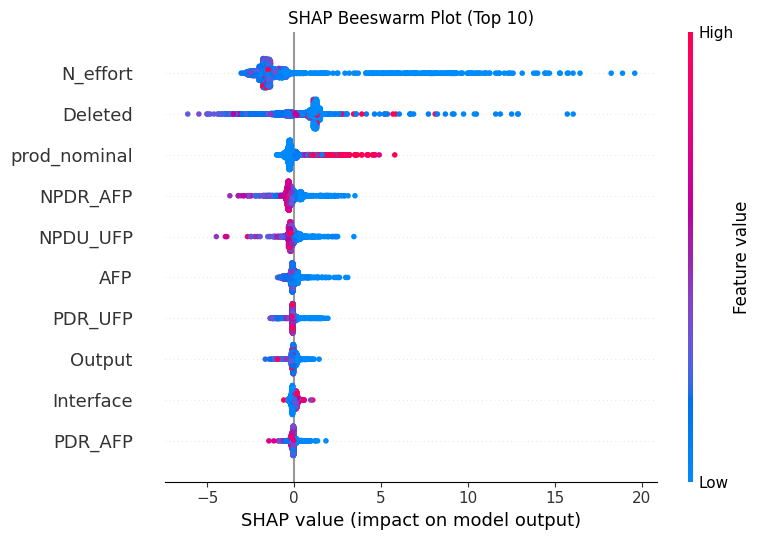

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''  # prevent GPU/CUDA import errors

import pandas as pd
import numpy as np
import shap
import pickle
import matplotlib.pyplot as plt

# Compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Calculate mean absolute SHAP values for feature importance
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance = pd.DataFrame({
    'feature': X_test.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

# Print top 10 features by mean(|SHAP|)
top10 = shap_importance.head(10).reset_index(drop=True)
print("Top 10 features by mean(|SHAP|):")
print(top10)

# Plot SHAP bar chart of top 10
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values, X_test,
    plot_type="bar",
    max_display=10,
    show=False
)
plt.title("SHAP Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

# Plot SHAP beeswarm for top 10
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values, X_test,
    feature_names=X_test.columns,
    max_display=10,
    show=False
)
plt.title("SHAP Beeswarm Plot (Top 10)")
plt.tight_layout()
plt.show()


In [ ]:
%%bash
cat > app.py << 'EOF'

import os
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from huggingface_hub import InferenceClient


# Config & Model Load
st.set_page_config(page_title="Overrun Advisor", layout="wide")

@st.cache_resource
def load_model_and_features():
    model = joblib.load("/content/xgb_tuned_best_param.pkl")
    explainer = shap.TreeExplainer(model)
    feature_cols = list(model.feature_names_in_)
    return model, explainer, feature_cols

model, explainer, FEATURE_COLS = load_model_and_features()


# Split raw vs engineered
RAW_FEATURES = FEATURE_COLS[:16]
ENGINEERED   = FEATURE_COLS[16:]

# Feature descriptions
feature_descriptions = {
    # Raw features...
    'AFP':            'Adjusted Function Points – size of delivered functionality',
    'Input':          'Number of input screens or transactions',
    'Output':         'Number of output reports or transactions',
    'Enquiry':        'Number of enquiry transactions (read-only screens)',
    'File':           'Number of logical files (data stores) used',
    'Interface':      'Number of external system interfaces',
    'Added':          'Count of function points added after initial scope',
    'Changed':        'Count of function points modified after initial scope',
    'Deleted':        'Count of function points removed after initial scope',
    'PDR_AFP':        'AFP at Preliminary Design Review – size agreed at PDR',
    'PDR_UFP':        'Unadjusted Function Points at PDR',
    'NPDR_AFP':       'AFP at “no‐PDR” or first build – size after major changes',
    'NPDU_UFP':       'Unadjusted Function Points at NPDR stage',
    'Resource':       'Number of team members assigned',
    'Dev.Type':       'Development type flag (e.g. 0=enhancement, 1=new development)',
    'Duration':       'Schedule length in months',
    'N_effort':       'Nominal effort estimate (person‐months) before overrun',
    'Effort':         'Actual effort expended (person‐months)',

    # Engineered features
    'overrun_pct':    'Percent effort overrun: (Effort/N_effort) – 1',
    'churn_rate':     'Scope churn as fraction of size: (Added+Changed+Deleted)/AFP',
    'pdr_ratio':      'Proportion signed‐off at PDR: PDR_AFP/AFP',
    'prod_nominal':   'Nominal productivity: AFP per planned person‐month',
    'prod_actual':    'Actual productivity: AFP per actual person‐month',
    'team_intensity': 'Team size per month: Resource/Duration',
    'churn_x_team':   'Interaction of churn and team: churn_rate × team_intensity',
}

# LLM client
HF_API_KEY = os.getenv("HF_API_KEY")
client = InferenceClient(provider="hyperbolic", api_key=HF_API_KEY)

def call_llm(prompt,
             model_name="deepseek-ai/DeepSeek-R1",
             temperature=0.5, max_tokens=200, top_p=0.7):
    # Add a system message to forbid chain-of-thought and enforce concise bullets
    messages = [
        {
            "role": "system",
            "content": (
                "You are an advisor. Produce exactly one bullet per feature, "
                "one sentence each, in the same order as given. "
                "Do NOT show your chain of thought or any analysis."
            )
        },
        {"role": "user", "content": prompt}
    ]
    response = client.chat.completions.create(
        model=model_name,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        stream=False
    )
    return response.choices[0].message.content.strip()

def build_llm_prompt(top5_shap):
    prompt_lines = ["Here are the top 5 factors driving project effort overruns, listed with their numeric SHAP impacts:"]
    for feat, val in top5_shap.iloc[:5].items():
        desc = feature_descriptions.get(feat, "")
        prompt_lines.append(f"- **{feat}** ({desc}) with impact {val:.4f}")
    prompt_lines.append(
        "\nFor each factor above, provide one concise, actionable tip to help reduce effort overruns. "
        "Use the numeric impact values to prioritize and—if helpful—mention the magnitude in your tip. "
        "Return exactly five bullets, one sentence each, in the same order."

    )
    return "\n".join(prompt_lines)

# UI
st.sidebar.header("Upload Project CSV")
uploaded = st.sidebar.file_uploader("CSV with raw features only", type="csv")

st.title("📊 Project Overrun Advisor")

if uploaded:
    df = pd.read_csv(uploaded)

    # ensure raw inputs
    missing = set(RAW_FEATURES) - set(df.columns)
    if missing:
        st.error(f"Missing columns: {sorted(missing)}")
        st.stop()

    # compute engineered
    df['churn_rate']     = (df['Added'] + df['Changed'] + df['Deleted']) / df['AFP']
    df['pdr_ratio']      = df['PDR_AFP'] / df['AFP']
    df['prod_nominal']   = df['AFP'] / df['N_effort']
    df['team_intensity'] = df['Resource'] / df['Duration']

    # build X and predict
    X = df[FEATURE_COLS]
    df['predicted_overrun_pct'] = model.predict(X)

    st.subheader("Predictions")
    st.dataframe(df[['predicted_overrun_pct'] + RAW_FEATURES])

    # SHAP analysis
    shap_vals = explainer.shap_values(X)
    mean_abs = np.abs(shap_vals).mean(axis=0)
    shap_ser = pd.Series(mean_abs, index=FEATURE_COLS).sort_values(ascending=False).iloc[:5]

    st.subheader("Global SHAP Feature Importance")
    plt.figure(figsize=(8, 4))
    shap.summary_plot(
        shap_vals,
        X,
        plot_type="bar",
        max_display=10,
        show=False
    )
    st.pyplot(plt.gcf())

    st.subheader("SHAP Beeswarm Plot")
    plt.figure(figsize=(8, 6))
    shap.summary_plot(
        shap_vals,
        X,
        max_display=10,
        show=False
    )
    st.pyplot(plt.gcf())

    # LLM tips
    st.subheader("💡 AI Recommendations")
    if st.button("Get AI Tips"):
        prompt = build_llm_prompt(shap_ser)
        with st.spinner("Generating tips…"):
            tips = call_llm(prompt)
        st.markdown(tips)


bash: line 172: warning: here-document at line 1 delimited by end-of-file (wanted `EOF')


In [ ]:
# NGROK for hosting
import os
from pyngrok import ngrok
from google.colab import userdata

# get the ngrok token
try:
    NGROK_TOKEN = userdata.get('NGROK_TOKEN')
    if NGROK_TOKEN is None:
        raise ValueError("NGROK_TOKEN not found in Colab secrets. Please add it.")
except Exception as e:
    print(f"Error accessing Colab secret: {e}")
    print("Please ensure you have added 'NGROK_TOKEN' to Colab's secrets manager with notebook access enabled.")
    NGROK_TOKEN = None

if NGROK_TOKEN:
    try:
        ngrok.set_auth_token(NGROK_TOKEN)
        print("Ngrok authentication token set successfully.")

        if not os.path.exists("app.py"):
            print("Error: app.py not found in the current directory.")
            print("Please upload your Streamlit application file.")
        else:
            print("Starting Streamlit app in the background...")
            from IPython import get_ipython
            get_ipython().system_raw("streamlit run app.py --server.port 8501 --server.headless true &")
            print("Streamlit app should be starting. This might take a few moments.")

            print("Opening ngrok tunnel to port 8501...")
            import time
            time.sleep(5) # Wait 5 seconds

            public_url = ngrok.connect(8501)
            print(f"Ngrok tunnel opened successfully!")
            print(f"Public URL: {public_url}")

    except Exception as e:
        print(f"An error occurred during ngrok setup or Streamlit execution: {e}")
else:
    print("NGROK_TOKEN was not set. Ngrok setup cannot proceed.")

Ngrok authentication token set successfully.
Starting Streamlit app in the background...
Streamlit app should be starting. This might take a few moments.
Opening ngrok tunnel to port 8501...
Ngrok tunnel opened successfully!
Public URL: NgrokTunnel: "https://6de2-34-132-22-79.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# run the streamlit app - hosting
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.132.22.79:8502

  Stopping...
^C


In [ ]:
# kkill ngrok
ngrok.kill()